Import common libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Set default plot size

In [72]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 8.0)

Load title.basics data

In [69]:
title_basics = pd.read_csv('title.basics.tsv', delimiter='\t', encoding='utf-8')

title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


Only keep movie related data

In [70]:
title_basics_movie = title_basics[title_basics['titleType'] == 'movie']

title_basics_movie.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"
611,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
626,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
669,tt0000675,movie,Don Quijote,Don Quijote,0,1908,\N,\N,Drama
670,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,0,1908,\N,\N,Drama
673,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"


Get moive start years (sorted and filtered)

In [79]:
start_years = list()

for i in title_basics_movie['startYear'].values:
    if i == '\\N':
        continue
    if type(i) != int:
        start_years.append(int(i))
    else:
        start_years.append(i)

start_years_sorted = np.sort(start_years)

start_index = np.argwhere(start_years_sorted == 2017 - 30)[-1][0]
end_index = np.argwhere(start_years_sorted == 2017)[-1][0]

start_years_sorted = start_years_sorted[start_index+1:end_index+1]

array([1988, 1988, 1988, ..., 2017, 2017, 2017])

Find distribution over year

In [80]:
year_unique, year_count = np.unique(start_years_sorted, return_counts=True)
distribution_years = dict(zip(year_unique, year_count))

distribution_years

{1988: 4229,
 1989: 4168,
 1990: 4568,
 1991: 4156,
 1992: 4107,
 1993: 3971,
 1994: 3934,
 1995: 4084,
 1996: 4086,
 1997: 4391,
 1998: 4472,
 1999: 4682,
 2000: 4860,
 2001: 5135,
 2002: 5308,
 2003: 5419,
 2004: 5989,
 2005: 6813,
 2006: 7250,
 2007: 7921,
 2008: 9344,
 2009: 11015,
 2010: 11823,
 2011: 12803,
 2012: 13646,
 2013: 14621,
 2014: 15391,
 2015: 16036,
 2016: 17217,
 2017: 18959}

Generate plot

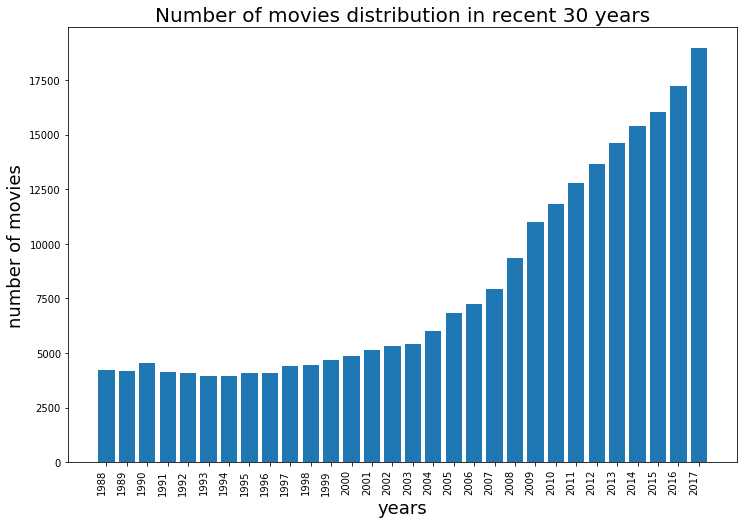

In [88]:
fig, ax = plt.subplots()

ax.bar(np.arange(len(distribution_years)), list(distribution_years.values()))

ax.set_title('Number of movies distribution in recent 30 years', fontsize=20)
ax.set_xlabel('years', fontsize=18)
ax.set_ylabel('number of movies', fontsize=18)

plt.xticks(np.arange(len(distribution_years)), list(distribution_years.keys()))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

#plt.savefig('top10movies.png')
plt.show()